In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# From: https://gist.github.com/mim/dc9e9b57b83ec9749cf5106602cb0604
import collections

from typing import Iterable


def stem_and_leaf(x: Iterable[int], interval: int = 10, sep: str = "") -> None:
    """Prints a stem-and-leaf plot. Adapted from:
  
    https://www.rosettacode.org/wiki/Stem-and-leaf_plot#Python

    The interval must be a power of 10 for this to work as expected.
    """
    assert interval % 10 == 0, "Interval not divisible by 10"
    # Maps from prefix (12|) to suffixes (2)
    d = collections.defaultdict(list)
    for val in x:
        prefix = val // interval
        suffix = val - prefix * interval
        d[prefix].append(suffix)
    max_pref_len = max(len(str(val)) for val in d.keys())
    for (prefix, suffix) in sorted(d.items()):
        # Left-pads it.
        prefix_str = str(prefix).rjust(max_pref_len)
        suffix_str = sep.join(str(val) for val in sorted(suffix))
        print(f"{prefix_str} | {suffix_str}")


# Leaf and stem plots with data from Johnson (2014)

In [3]:
alb = pd.read_csv("albuquerque.txt")

In [4]:
alb

,Temp
0,30
1,35
2,36
3,33
4,34
...,...
360,39
361,40
362,35
363,37


In [5]:
alb['Temp']

0      30
1      35
2      36
3      33
4      34
       ..
360    39
361    40
362    35
363    37
364    22
Name: Temp, Length: 365, dtype: int64

In [6]:
for temp in alb['Temp']:
    print(temp)

30
35
36
33
34
36
34
25
30
32
38
39
36
42
41
40
39
38
42
40
35
42
34
34
30
34
36
39
29
35
35
39
37
38
35
38
40
40
35
37
38
36
38
42
42
34
40
40
43
44
45
42
41
32
34
42
39
42
44
43
42
45
48
49
45
52
44
44
38
38
43
47
47
38
44
50
53
55
34
40
50
50
40
43
52
44
45
51
59
63
59
41
46
56
61
57
44
48
55
58
60
63
65
61
63
65
54
58
59
59
65
55
45
55
58
62
60
64
66
45
46
47
50
60
67
69
65
60
64
66
65
58
59
64
57
65
70
69
65
66
72
74
72
66
63
71
73
72
72
73
75
75
75
75
78
84
87
84
82
84
85
81
78
70
72
75
79
79
80
82
82
82
82
83
74
79
74
74
75
69
75
75
78
77
78
80
80
76
73
76
79
81
76
84
84
83
81
82
86
84
87
83
78
76
73
71
67
73
78
73
76
76
72
74
77
77
80
72
78
76
71
79
81
83
78
82
83
72
74
80
78
80
79
81
78
74
70
72
73
72
71
77
75
77
77
73
75
79
80
75
76
71
73
70
73
74
75
76
77
75
76
77
75
73
73
66
67
70
72
71
74
74
76
73
74
65
66
65
66
68
67
63
61
60
62
63
62
63
63
62
64
62
62
58
53
53
54
58
46
50
46
52
58
59
55
52
55
56
54
55
56
54
52
41
43
42
41
42
44
43
48
42
45
51
51
47
38
47
34
29
35
37
32
3

In [7]:
for temp in alb['Temp'][:10]:
    print(temp)

30
35
36
33
34
36
34
25
30
32


In [8]:
stem_and_leaf(alb['Temp'])

2 | 2599
3 | 000022234444444445555555556666666777788888888889999999
4 | 0000000000011111122222222222222233333333444444444455555555555556666667777778888999
5 | 000001112222233344445555555666778888888999999
6 | 00000111222222333333334444555555555666666677778999
7 | 000001111112222222222233333333333334444444444455555555555555666666666667777777788888888889999999
8 | 0000000111112222222333334444445677


# Pandas with data from Peterson and Barney (1952)

In [9]:
pb52 = pd.read_csv("pb52.tsv", sep="\t")

Scales:
 * Nominal: Type, Sex, Vowel
 * Ordinal: Speaker, Repetition
 * Interval
 * Ratio: F0, F1, F2, F3

In [10]:
pb52

,Type,Sex,Speaker,Vowel,Repetition,F0,F1,F2,F3
0,m,m,1,i,1,160,240,2280,2850
1,m,m,1,i,2,186,280,2400,2790
2,m,m,1,I,1,203,390,2030,2640
3,m,m,1,I,2,192,310,1980,2550
4,m,m,1,E,1,161,490,1870,2420
...,...,...,...,...,...,...,...,...,...
1515,c,f,76,U,2,322,610,1550,3400
1516,c,f,76,u,1,345,520,1250,3460
1517,c,f,76,u,2,334,500,1140,3380
1518,c,f,76,3',1,308,740,1850,2160


In [39]:
pb52.head(10)

,Type,Sex,Speaker,Vowel,Repetition,F0,F1,F2,F3,LogF0
0,m,m,1,i,1,160,240,2280,2850,7.321928
1,m,m,1,i,2,186,280,2400,2790,7.539159
2,m,m,1,I,1,203,390,2030,2640,7.665336
3,m,m,1,I,2,192,310,1980,2550,7.584963
4,m,m,1,E,1,161,490,1870,2420,7.330917
5,m,m,1,E,2,155,570,1700,2600,7.276124
6,m,m,1,{,1,140,560,1820,2660,7.129283
7,m,m,1,{,2,180,630,1700,2550,7.491853
8,m,m,1,V,1,144,590,1250,2620,7.169925
9,m,m,1,V,2,148,620,1300,2530,7.209453


In [41]:
pb52.index

RangeIndex(start=0, stop=1520, step=1)

In [13]:
pb52.columns

Index(['Type', 'Sex', 'Speaker', 'Vowel', 'Repetition', 'F0', 'F1', 'F2',
       'F3'],
      dtype='object')

In [43]:
pb52['Repetition'].value_counts()

2    760
1    760
Name: Repetition, dtype: int64

In [15]:
pb52['Type'].value_counts()

m    660
w    560
c    300
Name: Type, dtype: int64

## Distributions, seaborn

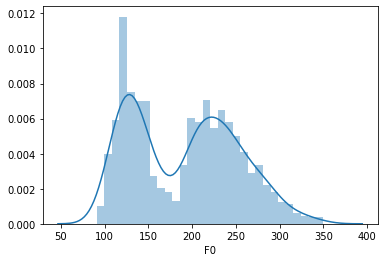

In [56]:
sns.distplot(pb52["F0"], bins=30)

In [54]:
pb52['Type'] == "w"

0       False
1       False
2       False
3       False
4       False
        ...  
1515    False
1516    False
1517    False
1518    False
1519    False
Name: Type, Length: 1520, dtype: bool

In [55]:
pb52[pb52['Type']=="w"]

,Type,Sex,Speaker,Vowel,Repetition,F0,F1,F2,F3,LogF0
660,w,f,34,i,1,230,370,2670,3100,7.845490
661,w,f,34,i,2,234,390,2760,3060,7.870365
662,w,f,34,I,1,234,468,2330,2930,7.870365
663,w,f,34,I,2,205,410,2380,2950,7.679480
664,w,f,34,E,1,190,550,2200,2880,7.569856
...,...,...,...,...,...,...,...,...,...,...
1215,w,f,61,U,2,250,450,1050,2450,7.965784
1216,w,f,61,u,1,260,290,670,2380,8.022368
1217,w,f,61,u,2,275,330,630,2460,8.103288
1218,w,f,61,3',1,240,500,1630,2040,7.906891


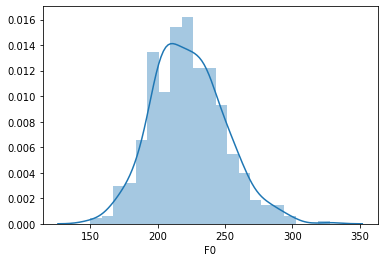

In [17]:
sns.distplot(pb52[pb52['Type']=="w"]["F0"])

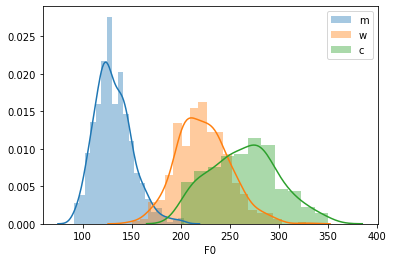

In [18]:
fig, ax = plt.subplots()
types = pb52['Type'].unique()
for a in types:
    sns.distplot(pb52[pb52['Type'] == a]['F0'], ax=ax)
_ = ax.legend(types)

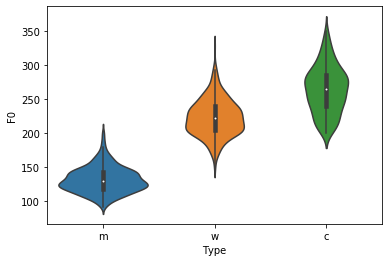

In [63]:
sns.violinplot(x='Type', y='F0', data=pb52)

In [64]:
stem_and_leaf(alb['Temp'])

2 | 2599
3 | 000022234444444445555555556666666777788888888889999999
4 | 0000000000011111122222222222222233333333444444444455555555555556666667777778888999
5 | 000001112222233344445555555666778888888999999
6 | 00000111222222333333334444555555555666666677778999
7 | 000001111112222222222233333333333334444444444455555555555555666666666667777777788888888889999999
8 | 0000000111112222222333334444445677


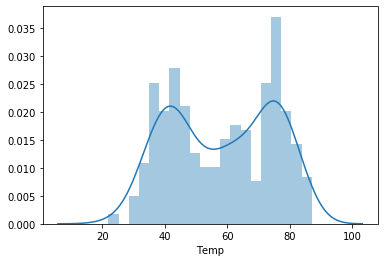

In [67]:
sns.distplot(alb['Temp'], bins=20)

In [68]:
alb['Temp'].mode()

0    42
dtype: int64

## Central tendencies

In [20]:
pb52.describe()

,Speaker,Repetition,F0,F1,F2,F3
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,38.500000,1.500000,191.295395,563.299342,1624.377632,2707.813816
std,21.944631,0.500165,60.362272,201.254297,637.012780,519.455448
min,1.000000,1.000000,91.000000,190.000000,560.000000,1400.000000
25%,19.750000,1.000000,133.000000,420.000000,1100.000000,2370.000000
50%,38.500000,1.500000,200.000000,540.000000,1470.000000,2680.000000
75%,57.250000,2.000000,238.000000,681.000000,2100.000000,3030.000000
max,76.000000,2.000000,350.000000,1300.000000,3610.000000,4380.000000


In [70]:
pb52[pb52['Type'] == "w"].describe()

,Speaker,Repetition,F0,F1,F2,F3,LogF0
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,47.500000,1.500000,222.960714,578.089286,1695.362500,2782.098214,7.790247
std,8.084969,0.500447,26.840786,199.468917,654.206452,383.692244,0.173557
min,34.000000,1.000000,150.000000,220.000000,590.000000,1480.000000,7.228819
25%,40.750000,1.000000,203.750000,420.000000,1137.500000,2600.000000,7.670653
50%,47.500000,1.500000,222.000000,533.500000,1500.000000,2820.000000,7.794416
75%,54.250000,2.000000,240.000000,735.250000,2300.000000,3030.000000,7.906891
max,61.000000,2.000000,328.000000,1110.000000,3100.000000,3900.000000,8.357552


In [69]:
pb52.groupby('Type')

In [21]:
pb52.groupby('Type').mean()

,Speaker,Repetition,F0,F1,F2,F3
Type,,,,,,
c,69.0,1.5,264.243333,675.186667,1931.200000,3285.266667
m,17.0,1.5,131.269697,499.892424,1424.683333,2382.306061
w,47.5,1.5,222.960714,578.089286,1695.362500,2782.098214


In [22]:
pb52.groupby(['Type', 'Sex']).mean()

Speaker  Repetition          F0          F1           F2  \
Type Sex                                                               
c    f    67.500000         1.5  270.350000  708.025000  1964.125000   
     m    70.714286         1.5  257.264286  637.657143  1893.571429   
m    m    17.000000         1.5  131.269697  499.892424  1424.683333   
w    f    47.500000         1.5  222.960714  578.089286  1695.362500   

                   F3  
Type Sex               
c    f    3442.812500  
     m    3105.214286  
m    m    2382.306061  
w    f    2782.098214

In [23]:
pb52.groupby('Vowel').mean()

,Speaker,Repetition,F0,F1,F2,F3
Vowel,,,,,,
3',38.5,1.5,190.434211,509.651316,1551.342105,1903.276316
A,38.5,1.5,182.723684,833.592105,1199.335526,2714.881579
E,38.5,1.5,187.934211,590.703947,2181.203947,2885.703947
I,38.5,1.5,197.855263,438.197368,2318.467105,2955.032895
O,38.5,1.5,186.098684,599.848684,910.138158,2695.447368
U,38.5,1.5,199.111842,473.065789,1149.065789,2621.894737
V,38.5,1.5,189.631579,721.973684,1350.690789,2709.032895
i,38.5,1.5,197.342105,301.263158,2648.355263,3238.289474
u,38.5,1.5,201.986842,358.006579,969.776316,2596.026316


In [24]:
pb52.groupby(['Type', 'Vowel']).mean()

Speaker  Repetition          F0           F1           F2  \
Type Vowel                                                              
c    3'        69.0         1.5  263.566667   568.966667  1805.833333   
     A         69.0         1.5  258.466667  1030.000000  1383.000000   
     E         69.0         1.5  259.033333   699.866667  2615.500000   
     I         69.0         1.5  270.333333   533.833333  2744.000000   
     O         69.0         1.5  259.233333   694.000000  1064.333333   
     U         69.0         1.5  273.233333   560.166667  1402.166667   
     V         69.0         1.5  262.600000   855.366667  1591.666667   
     i         69.0         1.5  269.566667   360.200000  3177.833333   
     u         69.0         1.5  278.300000   432.366667  1193.333333   
     {         69.0         1.5  248.100000  1017.100000  2334.333333   
m    3'        17.0         1.5  132.712121   488.515152  1359.833333   
     A         17.0         1.5  123.848485   718.424242  1090.893939   
     E         17.0         1.5  128.409091   526.196970  1854.409091   
     I         17.0         1.5  135.787879   392.348485  1993.439394   
     O         17.0         1.5  127.045455   568.318182   836.257576   
     U         17.0         1.5  136.106061   436.772727  1023.272727   
     V         17.0         1.5  128.560606   630.606061  1191.863636   
     i         17.0         1.5  136.000000   266.712121  2293.787879   
     u         17.0         1.5  139.378788   307.363636   875.969697   
     {         17.0         1.5  124.848485   663.666667  1727.106061   
w    3'        47.5         1.5  219.285714   502.785714  1640.714286   
     A         47.5         1.5  211.535714   864.107143  1228.750000   
     E         47.5         1.5  220.000000   608.250000  2333.696429   
     I         47.5         1.5  232.178571   441.000000  2473.571429   
     O         47.5         1.5  216.517857   586.571429   914.607143   
     U         47.5         1.5  233.660714   469.178571  1161.732143   
     V         47.5         1.5  222.517857   758.196429  1408.785714   
     i         47.5         1.5  230.946429   310.410714  2782.589286   
     u         47.5         1.5  234.892857   377.857143   960.571429   
     {         47.5         1.5  208.071429   862.535714  2048.607143   

                     F3  
Type Vowel               
c    3'     2194.000000  
     A      3187.666667  
     E      3564.000000  
     I      3604.000000  
     O      3263.333333  
     U      3332.333333  
     V      3328.000000  
     i      3763.000000  
     u      3250.333333  
     {      3366.000000  
m    3'     1708.878788  
     A      2442.121212  
     E      2481.439394  
     I      2568.712121  
     O      2403.166667  
     U      2245.287879  
     V      2377.348485  
     i      2937.424242  
     u      2238.954545  
     {      2419.727273  
w    3'     1976.642857  
     A      2783.071429  
     E      2998.785714  
     I      3062.678571  
     O      2735.696429  
     U      2685.160714  
     V      2768.357143  
     i      3311.785714  
     u      2666.339286  
     {      2832.464286

## Dispersion

In [25]:
# Append new column

pb52['LogF0'] = np.log2(pb52['F0'])

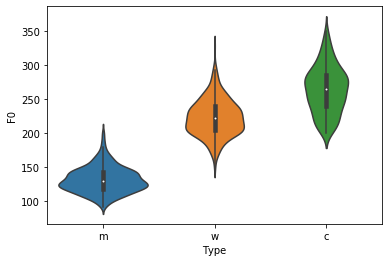

In [26]:
sns.violinplot(x='Type', y='F0', data=pb52)

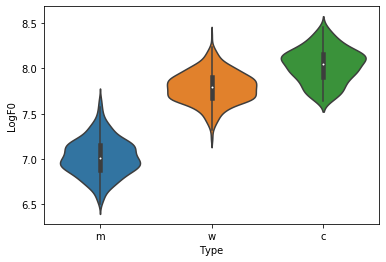

In [72]:
sns.violinplot(x='Type', y='LogF0', data=pb52)

In [28]:
pb52.groupby('Type').std()

,Speaker,Repetition,F0,F1,F2,F3,LogF0
Type,,,,,,,
c,4.327713,0.500835,34.629875,241.676126,723.255988,511.551770,0.190355
m,9.529126,0.500379,18.979343,152.309880,497.876908,340.226347,0.204401
w,8.084969,0.500447,26.840786,199.468917,654.206452,383.692244,0.173557


In [29]:
pb52.groupby('Type').skew()

,Speaker,Repetition,F0,F1,F2,F3,LogF0
Type,,,,,,,
c,0.0,0.0,0.150630,0.524620,0.432856,-0.887001,-0.119860
m,0.0,0.0,0.649375,-0.060663,0.383807,-0.212248,0.219065
w,0.0,0.0,0.322175,0.462590,0.330556,-0.648379,-0.055157


In [30]:
pb52.groupby('Type').apply(pd.DataFrame.kurt)

,Speaker,Repetition,F0,F1,F2,F3,LogF0
Type,,,,,,,
c,-1.210868,-2.013468,-0.545983,-0.497488,-1.030446,1.018241,-0.644032
m,-1.202217,-2.006088,0.642984,-0.913963,-1.024223,0.556897,-0.005167
w,-1.203085,-2.007181,0.243463,-0.707460,-1.230952,1.127510,0.120756


# Scatterplots

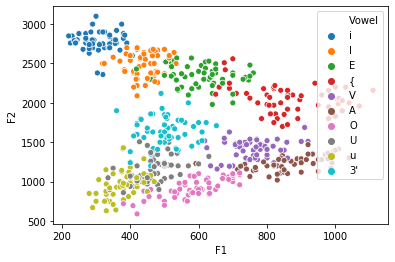

In [31]:
sns.scatterplot(data=pb52[pb52['Type'] == 'w'], x='F1', y='F2', hue="Vowel")

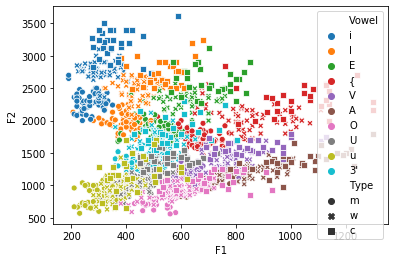

In [33]:
sns.scatterplot(data=pb52, x='F1', y='F2', hue="Vowel", style="Type")